=== Analisis Sebelum Pembersihan Outlier ===
       Unit Terjual
count    370.000000
mean     151.259459
std       33.729800
min       10.000000
25%      136.000000
50%      151.000000
75%      162.000000
max      500.000000


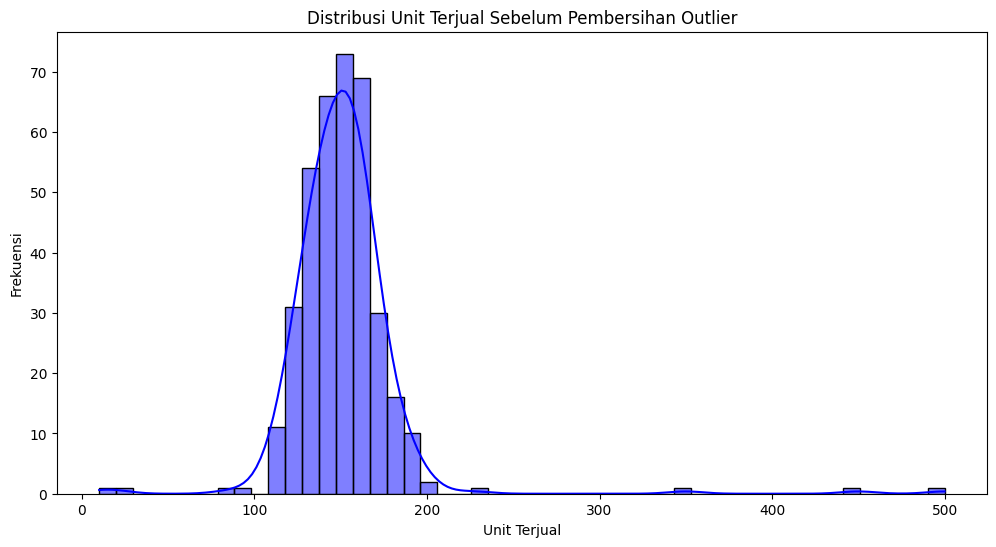



=== Proses Pembersihan Outlier Menggunakan Metode IQR ===
Jumlah data penjualan sebelum filter: 370
Jumlah data penjualan setelah filter: 362


=== Analisis Setelah Pembersihan Outlier ===
       Unit Terjual
count    362.000000
mean     149.502762
std       18.097803
min       97.000000
25%      136.000000
50%      150.500000
75%      162.000000
max      199.000000


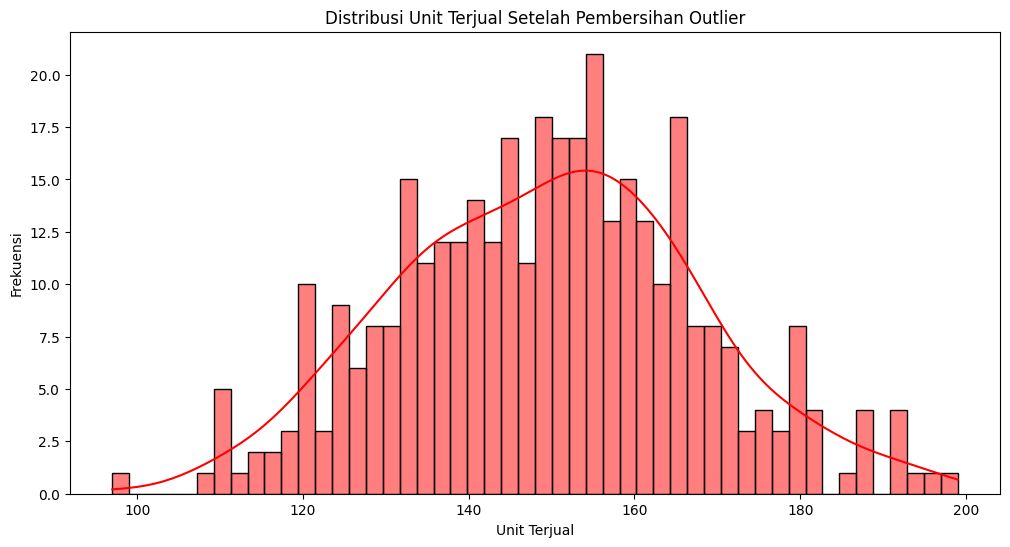

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1: Simulasi Data Penjualan Harian "Kopi Premium" Selama Setahun ---
# Membuat data penjualan harian fiktif (jumlah unit terjual)
np.random.seed(42)
unit_terjual_normal = np.random.normal(loc=150, scale=20, size=365).astype(int)
# Menambahkan beberapa outlier ekstrem
outliers_unit = [500, 450, 20, 10, 350] # Contoh: Penjualan saat promosi besar atau saat stok kosong
unit_terjual_final = np.concatenate((unit_terjual_normal, outliers_unit))
df = pd.DataFrame({'Unit Terjual': unit_terjual_final})

# Mengurutkan data (opsional, tapi membantu pemahaman)
df = df.sort_values(by='Unit Terjual').reset_index(drop=True)

# --- 2: Analisis dan Visualisasi Sebelum Pembersihan Outlier ---
print("=== Analisis Sebelum Pembersihan Outlier ===")
print(df.describe())

# Visualisasi distribusi penjualan sebelum pembersihan outlier
plt.figure(figsize=(12, 6))
sns.histplot(df['Unit Terjual'], bins=50, kde=True, color='blue')
plt.title('Distribusi Unit Terjual Sebelum Pembersihan Outlier')
plt.xlabel('Unit Terjual')
plt.ylabel('Frekuensi')
plt.show()

# --- 3: Penerapan Metode IQR untuk Menghilangkan Outlier ---
print("\n" + "="*50 + "\n")
print("=== Proses Pembersihan Outlier Menggunakan Metode IQR ===")
# Menghitung Kuartil (Q1 dan Q3)
Q1 = df['Unit Terjual'].quantile(0.25)
Q3 = df['Unit Terjual'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung Batas Bawah dan Batas Atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Memfilter DataFrame untuk menghapus outlier
df_filtered = df[(df['Unit Terjual'] >= lower_bound) &
                 (df['Unit Terjual'] <= upper_bound)]

print(f"Jumlah data penjualan sebelum filter: {len(df)}")
print(f"Jumlah data penjualan setelah filter: {len(df_filtered)}")

# --- 4: Analisis dan Visualisasi Setelah Pembersihan Outlier ---
print("\n" + "="*50 + "\n")
print("=== Analisis Setelah Pembersihan Outlier ===")
print(df_filtered.describe())

# Visualisasi distribusi penjualan setelah pembersihan outlier
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['Unit Terjual'], bins=50, kde=True, color='red')
plt.title('Distribusi Unit Terjual Setelah Pembersihan Outlier')
plt.xlabel('Unit Terjual')
plt.ylabel('Frekuensi')
plt.show()